# Reinforcement Learning

- RL is a subsection of ML
- Rewards desired behaviours, punishes undesired ones

### How does RL work?
- “There is an agent trying to complete a task in its environment.”
- We want to instruct the agent on how to learn to complete its task. There is a difference from directly telling the agent how to complete its task. 
- RL is all about training an agent that interacts with its environment. This agent arrives at different scenarios known as states, by performing different possible actions. 
- Sole purpose of agent is to maximize its total reward across an episode. An episode can be the duration from the first state to the last state, all within the environment. 
- We reinforce the agent’s behaviour by maximizing the chances of performing the best actions via experience/history, this is known as strategy or policy. 

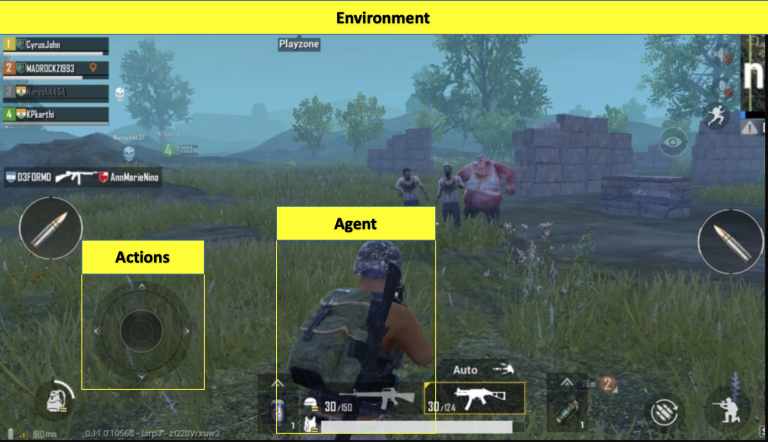


From the screenshot of the game above, we can see that:
- The agent here would be the soldier whom interacts with the environment
- States are just everything that we see on-screen
- A complete game defines one entire episde
- The actions are moving forward, backward, left, right, jump, duck, shoot, etc.
- Rewards are defined on the basis of the outcome of these actions. The agent obtaining kills of enemy soldiers would yeild a positive reward, while getting shot by an enemy means a negative reward. 

Reinforcement learning is all about figuring out how to perform the necessary sequence of actions in order to maximize the reward and minimize negative rewards. 


**3 Spaces**
State, Observation, and Action spaces
- These 3 spaces contain info about the agent and its environment 
- We use this information as we program how we want the agent to learn

State space: Everything that makes up current state of environment and agent

Observation space: Everything the agent can observe in its environment, at the given moment

Action space: Set of actions that an agent can take a given moment (list of possible actions it can undergo)

**Markov Decision Process (MDP)**
- Mathematical process that allows for simulation of decision making in a given process
- A decision can pretty much go 2 ways: 1. Under our control 2. Randomized event
- The **Markov Property** declares that the transition to each current state only depends on the previous state, and all the past states that occurred before the previous state **do not matter**. 




To better illustrate the Markov Property, consider the following:

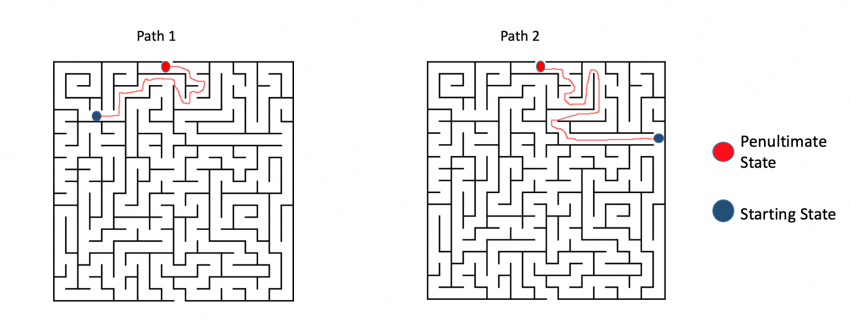

We have a starting state in blue and the penultimate (second last) state in red. Assuming the markov property holds, we consider the blue state to be the very first one (and we disregard all the states that happened in the past). The key piece to understand is the fact that the only information we need is how to get to the red state, even if our starting states (blue) are different. In other words, it doesn’t matter what path the agent takes to reach the red state. Once we reach the red state we can exit the maze. 


### Q-Learning

- A type of reinforcement learning which does not require a model, we call it a model-free RL algorithm. 
- A model-free algorithm has the agent learn policies directly, compared to a model-based algorithm. 

The whole goal of Q-learning is to obtain something called the **Q-value** (quality value).

The Q-value can be thought of as the total reward, the culmination of rewards after performing every single action correctly. It represents how well the action is perceived in the algorithm, and the higher the Q-value is, the more likely that same action will be repeated again. 

However, this scenario would be unrealistic as we can’t expect our agent to guarantee the right decision every single time. But say in an ideal world where our agent already knows the right answers in a whole episode, then the Q-value would be what’s obtained after the agent performs all the correct actions. 


Let’s break down and understand the formula for the total reward, or **Q-value**.
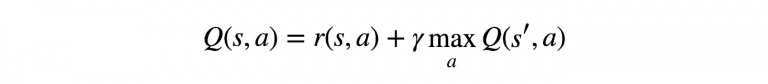

Q(s,a): The Q-value obtained from being at state s and performing action a

r(s,a): The immediate reward (when agent is at state s and performs action a)

𝛄maxQ(s’,a): The highest Q-value possible from next state s’. 

𝛄 (gamma symbol): The discount factor, which controls the contribution of rewards further in the future. 


### Q-tables

What are Q-tables and how do they relate to Q-learning?

As we mentioned previously, since Q-learning is a model-free algorithm, it uses previously learned "states" which have been explored to consider future moves and stores this information in a "Q-Table." 
Essentially, the Q-table serves as the memory for Q-learning, so it can learn from its past mistakes and make better moves in the future. 

For every action taken from a state, the Q table has to include a positive or negative reward. 

The model begins with a fixed epsilon value, which represents the randomization of movements. And over time, the randomization decreases depending on the epsilon decay value. 

Notably, if the state of the agent is considered to be largely unexplored, the agent would be more inclined to produce a randomly generated move, as an attempt to better learn the environment. 

Overall, this form of learning is particularly effective when there's a limited number of moves and/or the environment is not complicated. It becomes very easy for the agent to recall past moves and repeats them consistently. 

### What are some drawbacks of Q-learning?

- When it comes to more complex environments with alot more states invovled, the Q-table would fill up extremely quickly, resulting in very long training times until convergence is reached.
- Q-learning is extremely direct in the sense that it deals in absolutes. Either the state is familiar and the model already knows the action to take, or the state is unknown and a random action is applied. 
- The learning rate parameter plays a crucial role in Q-learning, and must be carefully considered. 
- Lastly, it is not necessarily always guaranteed that convergence will be reached. It depends on the environment. 

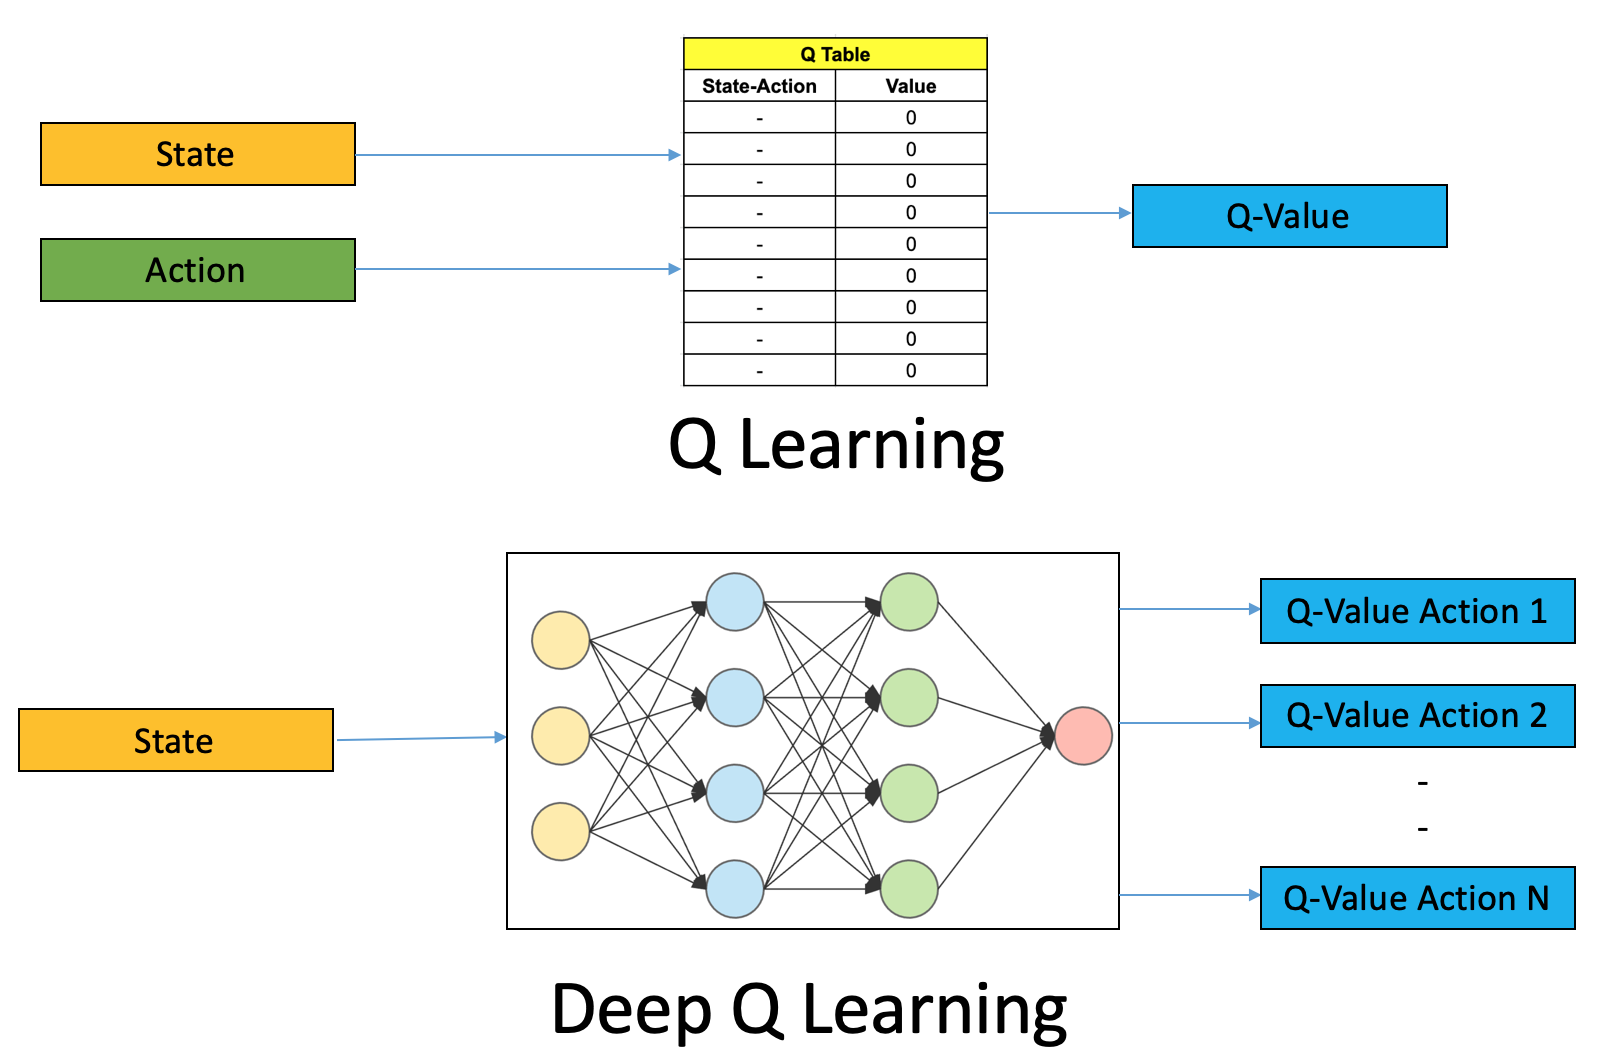

Preliminary steps: 

Before any of that, consider running ```pip install gym``` and ```pip install gym[classic_control]``` 


In [ ]:
# pip install gym

In [ ]:
# pip install gym[classic_control]

In [1]:
import random
import gym


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

### CartPole-v1

OpenAI offers an open-source environment called CartPole-v1. The CartPole itself consists of a cart, with a rotating pole attached to it. In this environment, the agent's (cartpole) ultimate goal is to remain standing up and maintain its vertical balance by adjusting the pole's angle perpendicular to the floor.

The cart can move along the x-axis, and can also freely rotate around its base. We apply forces that can cause the cart to move either left or right. 

The only allowable forces are +1 and -1, corresponding to left and right movements. The episode ends if the cart deviates more than 2.4 units from the center or if the angle exceeds 15 degrees from the vertical. Each timestamp that the episode remains active rewards the agent with a +1 reward.

Here is what the CartPole looks like:

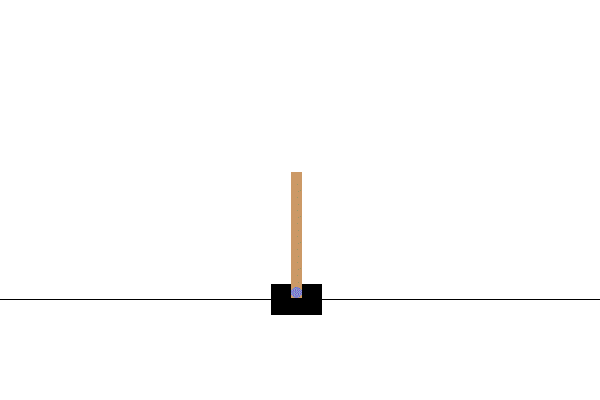

We have the pole which is the brown stick, and the cart which is the black rectangle.

There are four states here that we are concerned with:
1. Cart position (where its located on the horizontal plane)
2. Cart velocity 
3. Pole angle of rotation
4. Pole angular velocity 


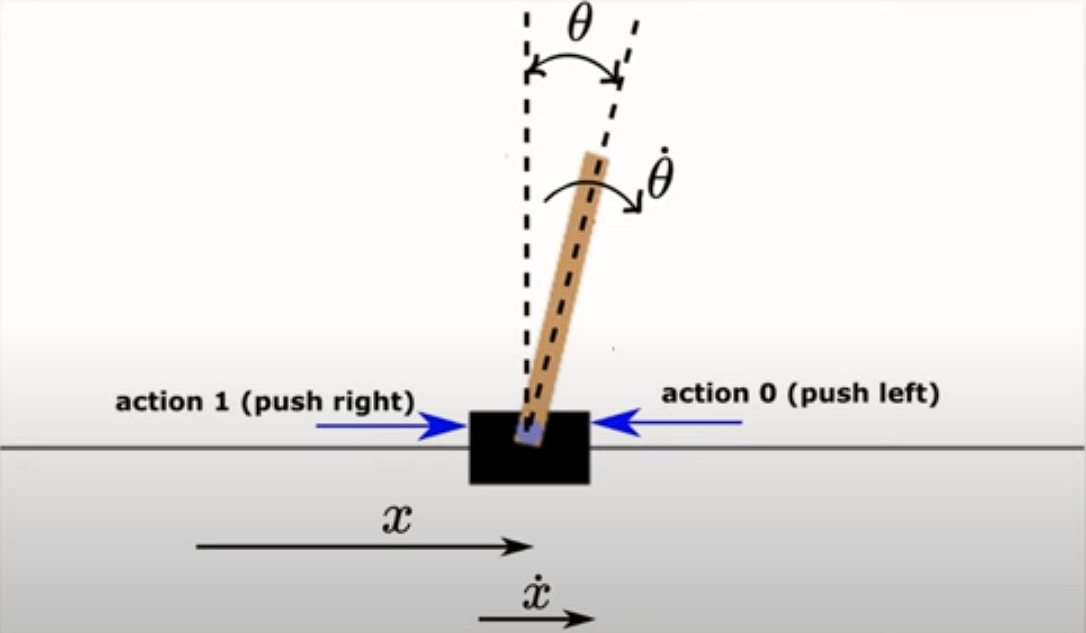

In terms of rewards, for every action we take (push either left or right), we get +1. This is assuming that our restrictions are met and maintained (such as keeping the pole with 15 degrees from vertical, and ensuring the cartpole is within 2.4 units of the center). 

In [1]:
import numpy as np # used for arrays

import gym # pull the environment

import time # to get the time

import math # needed for calculations

In [2]:
# Creating the environment
env = gym.make("CartPole-v1")
print(env.action_space.n)

2


C:\Users\TESTUSER\miniconda3\envs\cpsc330\lib\site-packages\gym\core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
C:\Users\TESTUSER\miniconda3\envs\cpsc330\lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [3]:
LEARNING_RATE = 0.1

DISCOUNT = 0.95
EPISODES = 60000
total = 0
total_reward = 0
prior_reward = 0

Observation = [30, 30, 50, 50]
np_array_win_size = np.array([0.25, 0.25, 0.01, 0.1]) # Controls the "steps" of cart position, cart velocity, pole angle, and pole velocity. 

epsilon = 1

epsilon_decay_value = 0.99995

In [4]:
# Setting up the Q-Table

q_table = np.random.uniform(low=0, high=1, size=(Observation + [env.action_space.n]))
q_table.shape

(30, 30, 50, 50, 2)

In [5]:
# Establishing a method to obtain discrete state

def get_discrete_state(state):
    discrete_state = state/np_array_win_size+ np.array([15,10,1,10])
    return tuple(discrete_state.astype(np.int))

In [ ]:
for episode in range(EPISODES + 1): 
    t0 = time.time() 
    discrete_state = get_discrete_state(env.reset()) 
    done = False
    episode_reward = 0 

    if episode % 2000 == 0:
        
        print("\nEpisode: " + str(episode))

    while not done: 

        if np.random.random() > epsilon:

            action = np.argmax(q_table[discrete_state])
        else:

            action = np.random.randint(0, env.action_space.n) 

        new_state, reward, done, _ = env.step(action) 
        episode_reward += reward 

        new_discrete_state = get_discrete_state(new_state)

        if episode % 2000 == 0: 
            env.render()

        if not done: 
            max_future_q = np.max(q_table[new_discrete_state])

            current_q = q_table[discrete_state + (action,)]

            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)

            q_table[discrete_state + (action,)] = new_q

        discrete_state = new_discrete_state

    if epsilon > 0.05:
        if episode_reward > prior_reward and episode > 10000:
            epsilon = math.pow(epsilon_decay_value, episode - 10000)

            if episode % 500 == 0:
                print("Epsilon: " + str(epsilon))

    t1 = time.time() 
    episode_total = t1 - t0 
    total = total + episode_total

    total_reward += episode_reward 
    prior_reward = episode_reward

    if episode % 1000 == 0:
        mean = total / 1000
        print("Time Average: " + str(mean))
        total = 0

        mean_reward = total_reward / 1000
        print("Mean Reward: " + str(mean_reward))
        total_reward = 0

env.close()

C:\Users\TESTUSER\AppData\Local\Temp\ipykernel_18976\3596469118.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return tuple(discrete_state.astype(np.int))
C:\Users\TESTUSER\miniconda3\envs\cpsc330\lib\site-packages\gym\core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', re


Episode: 0
Time Average: 0.0006173896789550781
Mean Reward: 0.014
Time Average: 0.0008255705833435058
Mean Reward: 22.545

Episode: 2000
Time Average: 0.001145936965942383
Mean Reward: 22.041
Time Average: 0.0008547585010528565
Mean Reward: 22.358

Episode: 4000
Time Average: 0.0010591025352478028
Mean Reward: 22.048
Time Average: 0.000840139627456665
Mean Reward: 22.149

Episode: 6000
Time Average: 0.0011939625740051269
Mean Reward: 22.771
Time Average: 0.000820171594619751
Mean Reward: 21.702

Episode: 8000
Time Average: 0.0014676287174224853
Mean Reward: 22.467
Time Average: 0.0008372373580932618
Mean Reward: 22.491

Episode: 10000
Time Average: 0.001075768232345581
Mean Reward: 21.511
Epsilon: 0.9753093024395111
Epsilon: 0.9512282354250458
Time Average: 0.0008881363868713379
Mean Reward: 22.992

Episode: 12000
Epsilon: 0.9048351558698463
Time Average: 0.0013636045455932618
Mean Reward: 24.355
Epsilon: 0.8607047486686201
Time Average: 0.0009207487106323242
Mean Reward: 24.718
Epsil

You may have noticed that the delay between each animation gets longer. This is because during that time, our model is actually undergoing Q-learning and figuring out how to better balance the pole!

### Summary of Results

We can see that our average reward is gradually rising, especially with a higher number of episodes. At around 40,000 episodes, the average reward was approximately 150. At 55,000 episodes, the average reward reached a value of 195! Our CartPole is successfully undergoing reinforcement learning!

Also notice that our average training time is constantly increasing, thus suggesting that our model is taking the time to learn from it's past mistakes, and ultimately the pole is being balanced much better. 

When looking at our pygame window, we can visually see that the pendulum is getting better at balancing itself vertically!